# Diagnostic Analysis using Python

### Scenario

You are part of a team of data analysts that was contracted by the National Health Services (NHS), a publicly funded healthcare system in England. The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood as explained by The British Medical Association (BMA) chair Professor Philip Banfield:

While it is frustrating when patients do not attend, the reasons why this happens should be investigated rather than simply resorting to punishing them. Financially penalising patients inevitably impact the poorest and most vulnerable in the community (GP Practice News 2022). 

Therefore, reducing or eliminating missed appointments would be beneficial financially as well as socially. The government needs a data-informed approach to deciding how best to handle this problem. At this stage of the project the two main questions posed by the NHS are:

Has there been adequate staff and capacity in the networks?
What was the actual utilisation of resources?

# Assignment 2 - import and explore the data

## Analyse provided data

1. How many locations are there in the data set?
2. What are the five locations with the highest number of records?
3. How many service settings, context types, national categories, and appointment statuses are there?

### Import Pandas and prepare DataFrames

In [164]:
# Import packages with standard conventions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.dates import * 
import matplotlib.pyplot as plt

ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrames.
print(ad.shape)
print(ad.columns)

print(ar.shape)
print(ar.columns)

print(nc.shape)
print(nc.columns)

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


### Determine descriptive statistics

In [145]:
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [146]:
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [147]:
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


In [148]:
ad.info()
ar.info()
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       59

### How many locations are there in the data set?

In [149]:
# Count how many locations using the nc DatFrame
locations = nc['sub_icb_location_name'].value_counts()

print(locations, '\n')
print(f"There are {len(locations)} locations in total.")

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: sub_icb_location_name, Length: 106, dtype: int64 

There are 106 locations in total.


### What are the five locations with the highest number of records?

In [150]:
# Count which locations have the highest number of records
nc['sub_icb_location_name'].value_counts().to_frame()

,sub_icb_location_name
NHS North West London ICB - W2U3Z,13007
NHS Kent and Medway ICB - 91Q,12637
NHS Devon ICB - 15N,12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
NHS North East London ICB - A3A8R,11837
...,...
NHS North East and North Cumbria ICB - 00N,4210
NHS Lancashire and South Cumbria ICB - 02G,4169
NHS Cheshire and Merseyside ICB - 01V,3496
NHS Cheshire and Merseyside ICB - 01T,3242


There are 106 locations.

Top 5 most number of records are:

NHS North West London ICB - W2U3Z	13007\
NHS Kent and Medway ICB - 91Q	12637\
NHS Devon ICB - 15N	12526\
NHS Hampshire and Isle Of Wight ICB - D9Y0V	12171\
NHS North East London ICB - A3A8R	11837

In [151]:
locations.head()

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Which areas have the most number of appointments:**

In [152]:
# Create subset for ease of use
locations2 = nc[['sub_icb_location_name','count_of_appointments']]

# Determine the most number of appointments among the locations
loc_sum = locations2.groupby(['sub_icb_location_name'])['count_of_appointments']\
.agg(sum).sort_values(ascending=False)

# View the DataFrame
print(loc_sum)

sub_icb_location_name
NHS North West London ICB - W2U3Z               12142390
NHS North East London ICB - A3A8R                9588891
NHS Kent and Medway ICB - 91Q                    9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V      8288102
NHS South East London ICB - 72Q                  7850170
                                                  ...   
NHS Cheshire and Merseyside ICB - 01V             641149
NHS Nottingham and Nottinghamshire ICB - 02Q      639660
NHS Greater Manchester ICB - 00V                  639211
NHS Cheshire and Merseyside ICB - 01T             606606
NHS Lancashire and South Cumbria ICB - 02G        554694
Name: count_of_appointments, Length: 106, dtype: int64


### How many service settings, context types, national categories, and appointment statuses are there?

**Service settings:**

In [153]:
# Count how many service settings are there
nc['service_setting'].value_counts().to_frame()

,service_setting
General Practice,359274
Primary Care Network,183790
Other,138789
Extended Access Provision,108122
Unmapped,27419


In [154]:
# Count how many service settings are there
serv_set = nc['service_setting'].value_counts().to_frame()

print(serv_set, '\n')
print(f"There are {len(serv_set)} service settings used.")

                           service_setting
General Practice                    359274
Primary Care Network                183790
Other                               138789
Extended Access Provision           108122
Unmapped                             27419 

There are 5 service settings used.


**Context types:**

In [155]:
# Count how many context types are there
nc['context_type'].value_counts().to_frame()

,context_type
Care Related Encounter,700481
Inconsistent Mapping,89494
Unmapped,27419


In [156]:
# Count how many context types are there
con_types = nc['context_type'].value_counts().to_frame()

print(con_types, '\n')
print(f"There are {len(con_types)} context types used.")

                        context_type
Care Related Encounter        700481
Inconsistent Mapping           89494
Unmapped                       27419 

There are 3 context types used.


**National categories:**

In [157]:
# Count how many national categories are there
nc['national_category'].value_counts().to_frame()

,national_category
Inconsistent Mapping,89494
General Consultation Routine,89329
General Consultation Acute,84874
Planned Clinics,76429
Clinical Triage,74539
Planned Clinical Procedure,59631
Structured Medication Review,44467
Service provided by organisation external to the practice,43095
Home Visit,41850
Unplanned Clinical Activity,40415


In [158]:
# Count how many national categories are there
nat_cat = nc['national_category'].value_counts().to_frame()

print(nat_cat, '\n')
print(f"There are {len(nat_cat)} national categories used.")

                                                                     national_category
Inconsistent Mapping                                                             89494
General Consultation Routine                                                     89329
General Consultation Acute                                                       84874
Planned Clinics                                                                  76429
Clinical Triage                                                                  74539
Planned Clinical Procedure                                                       59631
Structured Medication Review                                                     44467
Service provided by organisation external to the practice                        43095
Home Visit                                                                       41850
Unplanned Clinical Activity                                                      40415
Patient contact during Care Home Round     

**Appointment statuses:**

In [159]:
# Count how many appointment statuses are there
ar['appointment_status'].value_counts().to_frame()

,appointment_status
Attended,232137
Unknown,201324
DNA,163360


In [160]:
# Count how many appointment statuses are there
app_stat = ar['appointment_status'].value_counts().to_frame()

print(app_stat, '\n')
print(f"There are {len(app_stat)} appointment statuses used.")

          appointment_status
Attended              232137
Unknown               201324
DNA                   163360 

There are 3 appointment statuses used.


In [161]:
app_stat_subset = ar[['icb_ons_code', 'appointment_status', 'count_of_appointments']]
print(app_stat_subset)

       icb_ons_code appointment_status  count_of_appointments
0         E54000034           Attended                   8107
1         E54000034           Attended                   6791
2         E54000034           Attended                  20686
3         E54000034           Attended                   4268
4         E54000034           Attended                  11971
...             ...                ...                    ...
596816    E54000050            Unknown                     21
596817    E54000050            Unknown                      8
596818    E54000050            Unknown                     28
596819    E54000050            Unknown                     17
596820    E54000050            Unknown                     10

[596821 rows x 3 columns]


In [162]:
# Determine the total count of status to understand opportunities in data
app_stat_sum = app_stat_subset.groupby(['appointment_status'])['count_of_appointments']\
.agg(sum).sort_values(ascending=False)

# View the DataFrame
print(app_stat_sum)

appointment_status
Attended    677755876
Unknown      34137416
DNA          30911233
Name: count_of_appointments, dtype: int64


([<matplotlib.patches.Wedge at 0x7fd2f5f8f7c0>,
 [Text(-1.0586334946919762, 0.2988228972422523, ''),
  Text(1.0106441024596493, -0.43427928590197556, ''),
  Text(1.090612996540333, -0.14339906477141198, '')],
 [Text(-0.5774364516501688, 0.16299430758668304, '91%'),
  Text(0.5512604195234451, -0.23687961049198664, '5%'),
  Text(0.5948798162947271, -0.07821767169349743, '4%')])

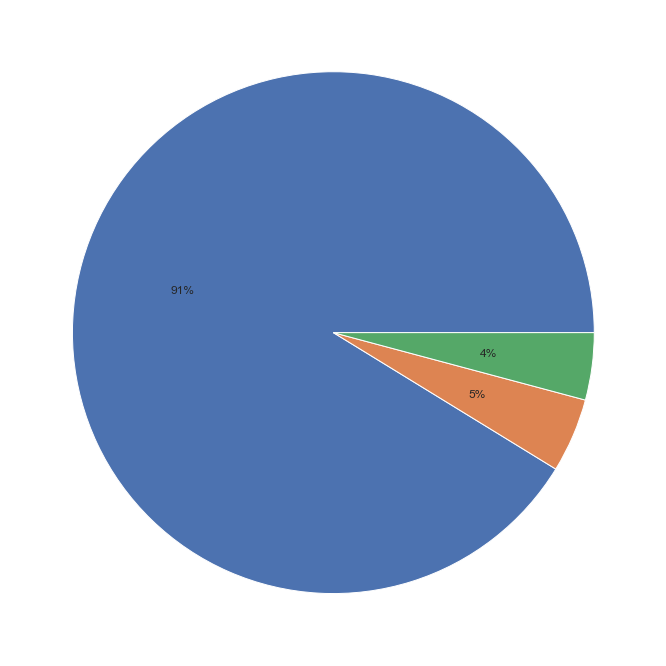

In [169]:
# plotting data on chart
plt.pie(app_stat_sum, autopct='%.0f%%')

### Are there any insights and trends identified while determining the results?

As already indicated there are a lot of quality issues in the data and that is apparent here.  However, looking at the content itself:
1. On apppointment status, which we will dwell on in this project:
    - 91% of the regional appointments show that patients have attended their appointments.  there is 5% of Did not Attend (DNA) and 4% Unknown that we have an opportunity to look into further.  This is where the unnecessary costs are.

2. On national categories and context types:
    - From a data sanitation and streamlining perspective, it would be beneficial if the national categories are standardised so that time spent and future pritoritisation can be reviewed more accurately.
    - Inconsistent mapping is at 5th position while Unmapped items is currently 7th (in volume) out of 18 categories.  This is a sizeable 13% of transactions that we cannot trace at the moment.

# Assignment 3 - analyse the data

## Analyse provided data

1. Between what dates were appointments scheduled? 
2. Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
3. Which month had the highest number of appointments?
4. What was the total number of records per month?

In [170]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [171]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


Date format of ad is DD-Mmm-YY

In [172]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


Date format of nc is YYYY-MM-DD

In [173]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439


In [174]:
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [175]:
# Change the date format of ar['appointment_date'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DateFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


In [176]:
# Change the date format of ar['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


### Between what dates were appointments scheduled? 

In [177]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print(ad['appointment_date'].min(), '\n')
print(ad['appointment_date'].max(), '\n')

print(f"Appointments are between {(ad['appointment_date'].min())} and \
{(ad['appointment_date'].max())} in the actual duration database.")

2021-12-01 00:00:00 

2022-06-30 00:00:00 

Appointments are between 2021-12-01 00:00:00 and 2022-06-30 00:00:00 in the actual duration database.


In [178]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(nc['appointment_date'].min(), '\n')
print(nc['appointment_date'].max(), '\n')

print(f"Appointments are between {(nc['appointment_date'].min())} and \
{(nc['appointment_date'].max())} in the national categories database.")

2021-08-01 00:00:00 

2022-06-30 00:00:00 

Appointments are between 2021-08-01 00:00:00 and 2022-06-30 00:00:00 in the national categories database.


### Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

In [179]:
# Write a function to identify all rows with code 'W2U3Z' 
# between January 1 2022 and June 1 2022.
nwlondon=nc.loc[nc['sub_icb_location_name'].str.contains("W2U3Z",case=False) & (nc['appointment_date'] >= '2022-01-01') &\
             (nc['appointment_date'] < '2022-06-02')]

nwlondon

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


In [180]:
# Using the filtered data, determine the highest number of appointments based on the
# service setting being reviewed
nwlondon.groupby('service_setting')[['count_of_appointments']]\
.sum().sort_values('count_of_appointments', ascending=False)

,count_of_appointments
service_setting,
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


The GP had the most number of appointments in North West London between 1 January to 1 June 2022.

### Which month had the highest number of appointments?

**Which month had the highest number of appointments using all available months?**

In [181]:
# Review which DataFrame has the most entries
print(ad['count_of_appointments'].sum(), '\n') 
print(nc['count_of_appointments'].sum())

167980692 

296046770


In [182]:
# Using the original data total the monthly appointments
ad.groupby([(ad.appointment_date.dt.year), (ad.appointment_date.dt.month)])\
['count_of_appointments'].sum().sort_values(ascending=False)

appointment_date  appointment_date
2022              3                   27170002
                  5                   25343941
                  6                   23715317
                  1                   23597196
                  2                   23351939
2021              12                  22853483
2022              4                   21948814
Name: count_of_appointments, dtype: int64

There are more missing months compared to nc so DF to be used for this set will be nc

In [183]:
# Using the nc data total the monthly appointments
nc.groupby([(nc.appointment_date.dt.year), (nc.appointment_date.dt.month)])\
['count_of_appointments'].sum().sort_values(ascending=False)

appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64

The highest number of appointments was November 2021, followed by October 2021.

*Caveat: As August is the start of the data we may need to take with caution as there may be data collection issues at the start of each similar initiative.  Projections may be made for July, as well given that this is not yet available.*

Overall rank as follows:

| Year | Month |
| :- | :- |
| 2021 | November |
| 2021 | October |
| 2022 | March |
| 2021 | September |
| 2022 | May |
| 2022 | June |
| 2022 | January |
| 2022 | February |
| 2021 | December |
| 2022 | April |
| 2021 | August |

From a project perspective, there is opportunity in the second half of the year to focus on the high volume month and implement changes we can still impact to see the most potential for improvement.

In [184]:
nc_total = nc.groupby(['appointment_month'])['count_of_appointments']\
.agg(sum).reset_index()

nc_total

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


Text(0.5, 0.92, 'Appointments')

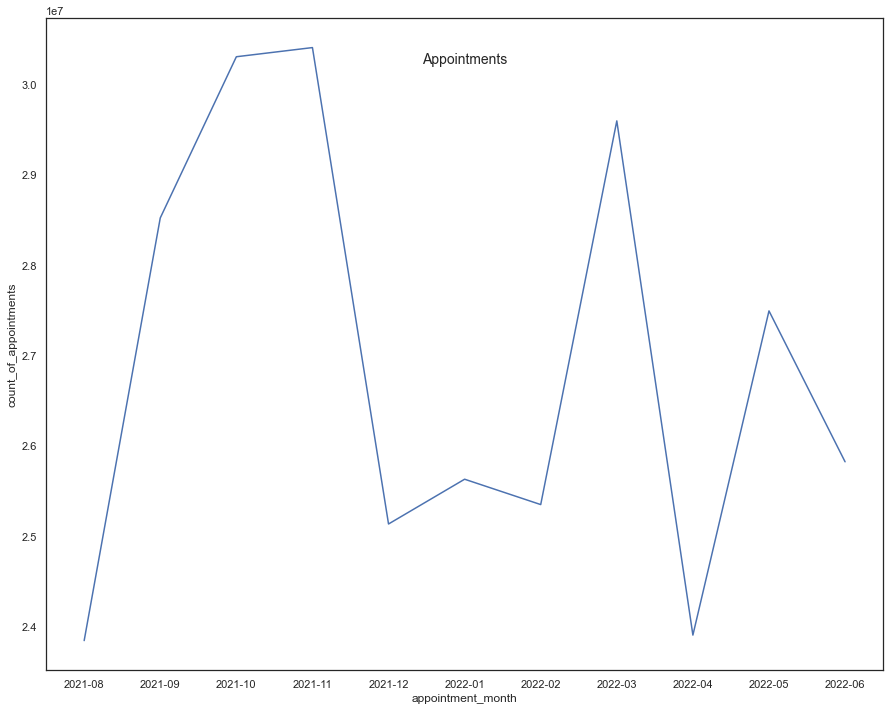

In [185]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for service settings
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             ci=None, data=nc_total).set_title("Appointments", fontsize=14, y=0.92)


### What was the total number of records per month?

**What was the total number of records per month using all months?**

In [186]:
# Using the nc data, what is the total count of records per month
nc.groupby([(nc.appointment_date.dt.year), (nc.appointment_date.dt.month)])\
['count_of_appointments'].count().sort_values(ascending=False)

appointment_date  appointment_date
2022              3                   82822
2021              11                  77652
2022              5                   77425
2021              9                   74922
2022              6                   74168
2021              10                  74078
                  12                  72651
2022              1                   71896
                  2                   71769
                  4                   70012
2021              8                   69999
Name: count_of_appointments, dtype: int64

Text(0.5, 0.92, 'Appointments')

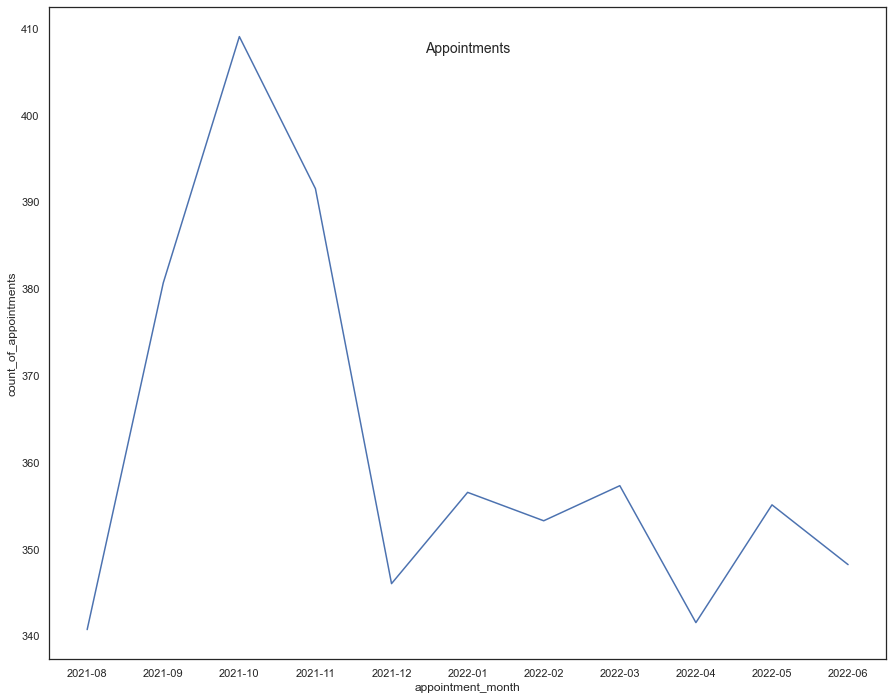

In [187]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for service settings
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             ci=None, data=nc).set_title("Appointments", fontsize=14, y=0.92)


The highest number of records logged was March 2022, followed by November 2021.

*Caveat: Similarly when aggregating appontment, as August is the start of the data we may need to take with caution as there may be data collection issues at the start of each similar initiative.  Projections may be made for July, as well given that this is not yet available.*

Overall rank of records, as follows:

| Year | Month |
| :- | :- |
| 2022 | March |
| 2021 | November |
| 2022 | May |
| 2021 | September |
| 2022 | June |
| 2021 | October |
| 2021 | December |
| 2022 | January |
| 2022 | February |
| 2022 | April |
| 2021 | August |

In [188]:
print(nc.columns)

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [189]:
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

# Assignment 4 - Visualise and identify initial trends

## Visualise the following

1. Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.
2. Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

1. Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [190]:
# Import Matplotlib, Seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from matplotlib.dates import * 
import matplotlib.pyplot as plt

In [191]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

In [192]:
# Aggregate the appointments per month and determine the sum of the
# appointments per month for service settings
nc_ss = nc.groupby(['appointment_month','service_setting'])['count_of_appointments']\
.agg(sum).reset_index()

print(nc_ss)

   appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13    

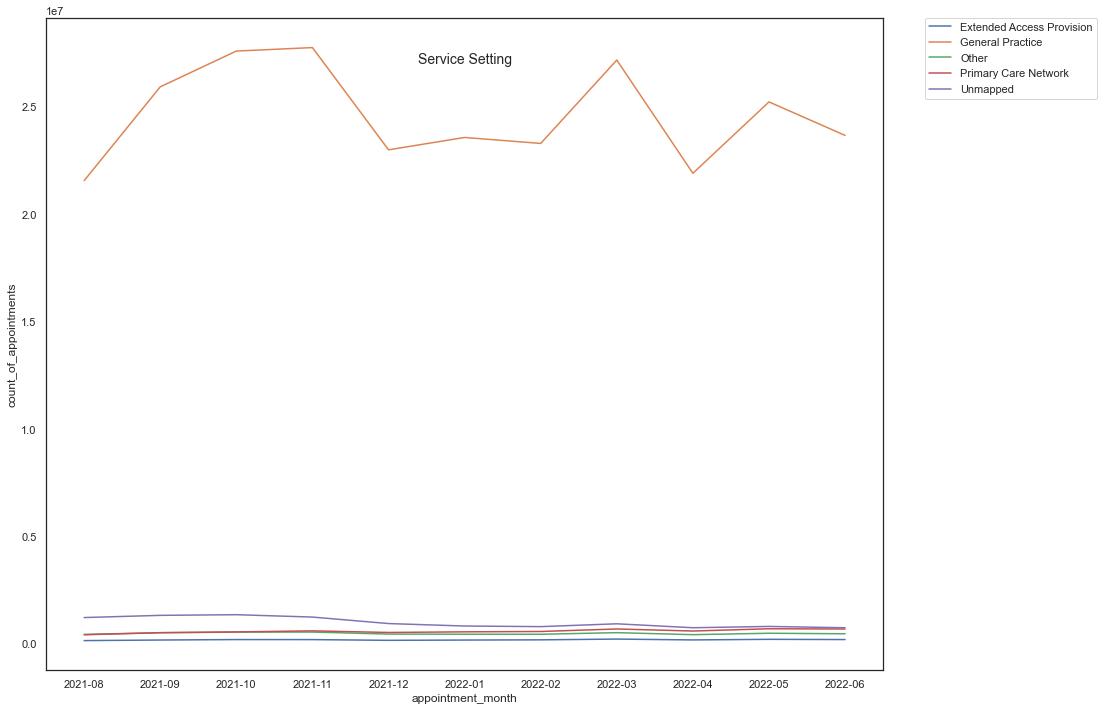

In [193]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for service settings
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss).set_title("Service Setting", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [194]:
# Aggregate the appointments per month and determine the sum of the
# appointments per month for context types
nc_ct = nc.groupby(['appointment_month','context_type'])['count_of_appointments']\
.agg(sum).reset_index()

print(nc_ct)

   appointment_month            context_type  count_of_appointments
0            2021-08  Care Related Encounter               20255235
1            2021-08    Inconsistent Mapping                2363093
2            2021-08                Unmapped                1233843
3            2021-09  Care Related Encounter               24404251
4            2021-09    Inconsistent Mapping                2782135
5            2021-09                Unmapped                1336115
6            2021-10  Care Related Encounter               26125201
7            2021-10    Inconsistent Mapping                2811977
8            2021-10                Unmapped                1366656
9            2021-11  Care Related Encounter               26282778
10           2021-11    Inconsistent Mapping                2865796
11           2021-11                Unmapped                1256496
12           2021-12  Care Related Encounter               21798612
13           2021-12    Inconsistent Mapping    

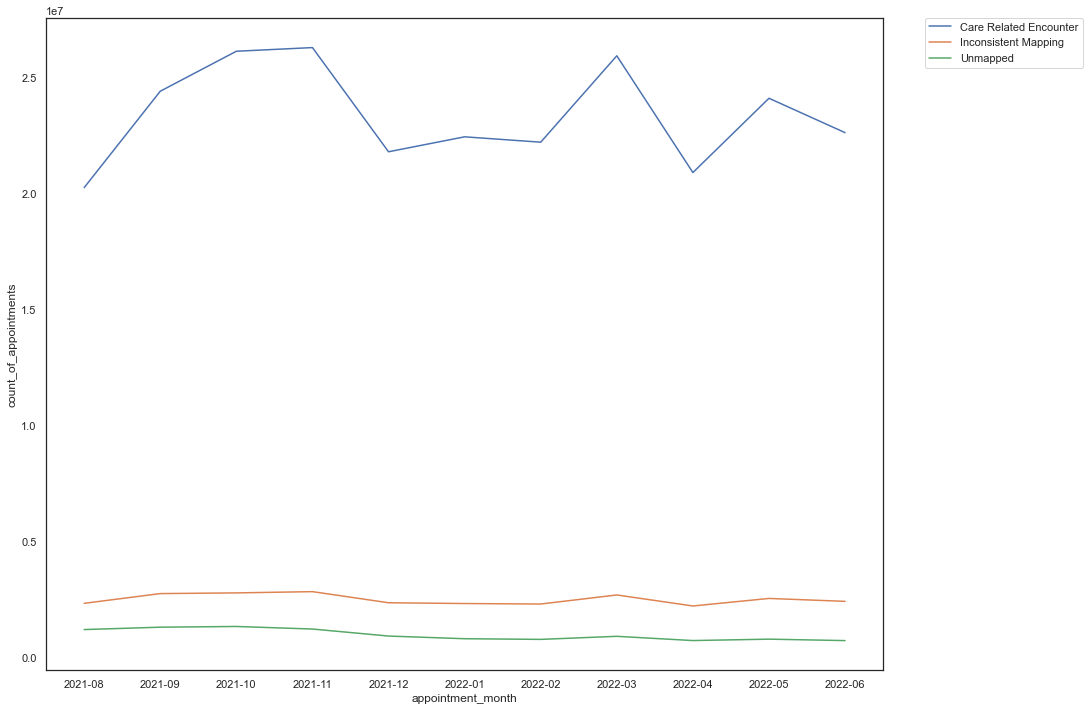

In [195]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for context_type
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='context_type', ci=None, data=nc_ct)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

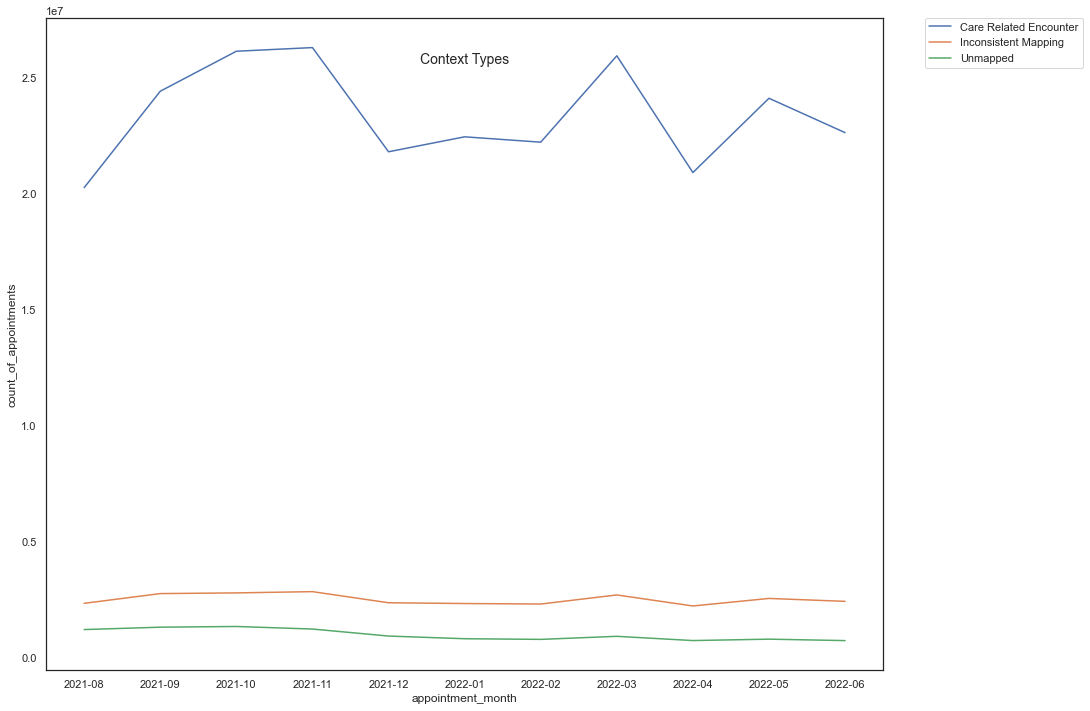

In [196]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for context_type
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='context_type', ci=None, data=nc_ct).set_title("Context Types", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [197]:
# Aggregate the appointments per month and determine the sum of the
# appointments per month for context types
nc_nc = nc.groupby(['appointment_month','national_category'])['count_of_appointments']\
.agg(sum).reset_index()

print(nc_nc)

    appointment_month  \
0             2021-08   
1             2021-08   
2             2021-08   
3             2021-08   
4             2021-08   
..                ...   
193           2022-06   
194           2022-06   
195           2022-06   
196           2022-06   
197           2022-06   

                                                       national_category  \
0    Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                        Care Home Visit   
2                                                        Clinical Triage   
3                                             General Consultation Acute   
4                                           General Consultation Routine   
..                                                                   ...   
193                                           Social Prescribing Service   
194                                         Structured Medication Review   
195            

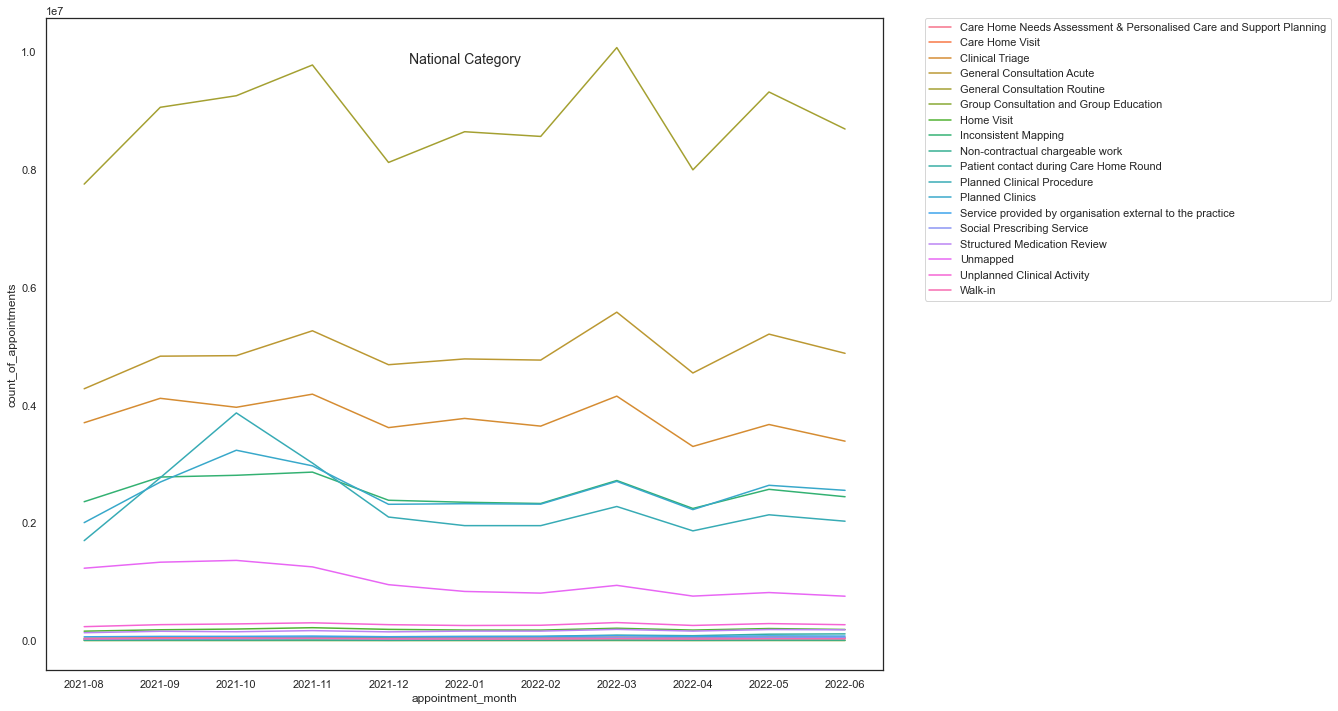

In [198]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for national categories
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='national_category', ci=None, data=nc_nc).set_title("National Category", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2. Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

In [199]:
# Aggregate the appointments per month and determine the sum of the
# records per season (specified month).
nc_ss_day = nc.groupby(['appointment_month','appointment_date', 'service_setting'])['count_of_appointments']\
.agg(sum).reset_index()

print(nc_ss_day)

     appointment_month appointment_date            service_setting  \
0              2021-08       2021-08-01  Extended Access Provision   
1              2021-08       2021-08-01           General Practice   
2              2021-08       2021-08-01                      Other   
3              2021-08       2021-08-01       Primary Care Network   
4              2021-08       2021-08-01                   Unmapped   
...                ...              ...                        ...   
1665           2022-06       2022-06-30  Extended Access Provision   
1666           2022-06       2022-06-30           General Practice   
1667           2022-06       2022-06-30                      Other   
1668           2022-06       2022-06-30       Primary Care Network   
1669           2022-06       2022-06-30                   Unmapped   

      count_of_appointments  
0                       438  
1                      3411  
2                       401  
3                       323  
4        

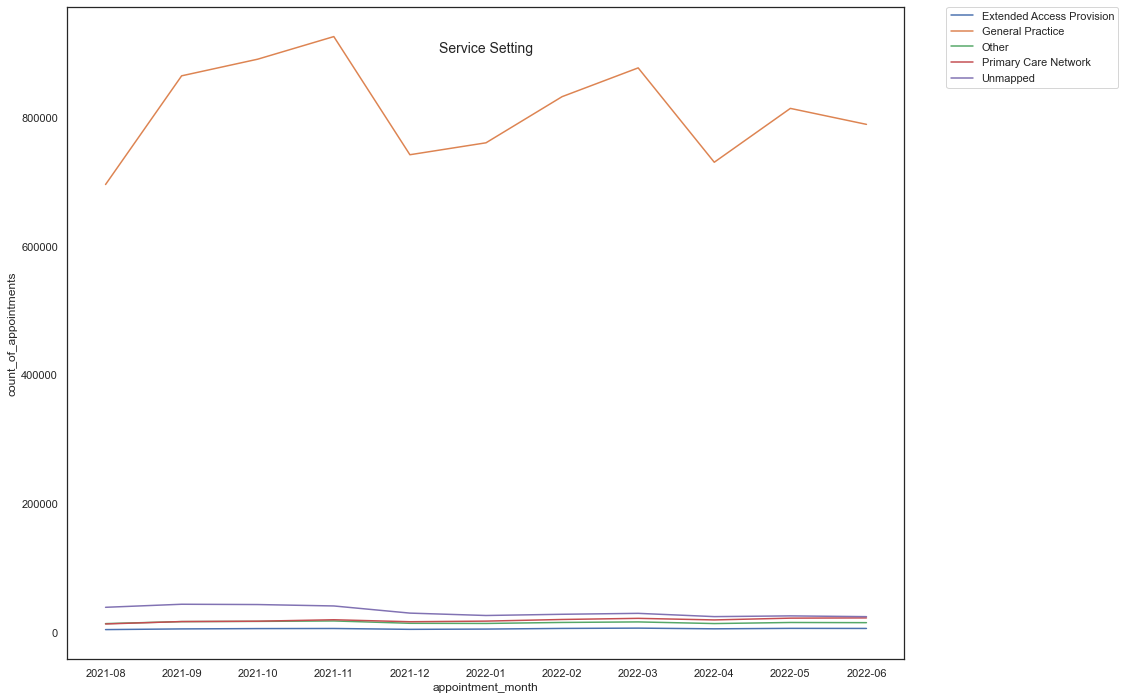

In [200]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for the seasons
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss_day).set_title("Service Setting", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [201]:
# Subset summer
summer = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-08-01') &\
                   (nc_ss_day['appointment_date'] < '2021-10-01')]

summer     

,appointment_month,appointment_date,service_setting,count_of_appointments
0,2021-08,2021-08-01,Extended Access Provision,438
1,2021-08,2021-08-01,General Practice,3411
2,2021-08,2021-08-01,Other,401
3,2021-08,2021-08-01,Primary Care Network,323
4,2021-08,2021-08-01,Unmapped,1054
...,...,...,...,...
300,2021-09,2021-09-30,Extended Access Provision,7545
301,2021-09,2021-09-30,General Practice,1151557
302,2021-09,2021-09-30,Other,25037
303,2021-09,2021-09-30,Primary Care Network,25013


In [202]:
august = nc_ss_day.loc[nc_ss_day['appointment_month'].str.contains("2021-08") & \
                       (nc_ss_day['appointment_date'] >= '2021-08-01') & \
                       (nc_ss_day['appointment_date'] < '2022-09-01')]

august

,appointment_month,appointment_date,service_setting,count_of_appointments
0,2021-08,2021-08-01,Extended Access Provision,438
1,2021-08,2021-08-01,General Practice,3411
2,2021-08,2021-08-01,Other,401
3,2021-08,2021-08-01,Primary Care Network,323
4,2021-08,2021-08-01,Unmapped,1054
...,...,...,...,...
150,2021-08,2021-08-31,Extended Access Provision,8281
151,2021-08,2021-08-31,General Practice,1125584
152,2021-08,2021-08-31,Other,23181
153,2021-08,2021-08-31,Primary Care Network,21789


In [203]:
september = nc_ss_day.loc[nc_ss_day['appointment_month'].str.contains("2021-09") & \
                       (nc_ss_day['appointment_date'] >= '2021-09-01') & \
                       (nc_ss_day['appointment_date'] < '2022-10-01')]

september

,appointment_month,appointment_date,service_setting,count_of_appointments
155,2021-09,2021-09-01,Extended Access Provision,6916
156,2021-09,2021-09-01,General Practice,1041879
157,2021-09,2021-09-01,Other,21796
158,2021-09,2021-09-01,Primary Care Network,21371
159,2021-09,2021-09-01,Unmapped,57423
...,...,...,...,...
300,2021-09,2021-09-30,Extended Access Provision,7545
301,2021-09,2021-09-30,General Practice,1151557
302,2021-09,2021-09-30,Other,25037
303,2021-09,2021-09-30,Primary Care Network,25013


In [204]:
# Subset autumn
autumn = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-10-01') &\
                   (nc_ss_day['appointment_date'] < '2021-12-01')]

autumn                                                                          

,appointment_month,appointment_date,service_setting,count_of_appointments
305,2021-10,2021-10-01,Extended Access Provision,7107
306,2021-10,2021-10-01,General Practice,1130646
307,2021-10,2021-10-01,Other,22639
308,2021-10,2021-10-01,Primary Care Network,22974
309,2021-10,2021-10-01,Unmapped,56201
...,...,...,...,...
605,2021-11,2021-11-30,Extended Access Provision,9077
606,2021-11,2021-11-30,General Practice,1254637
607,2021-11,2021-11-30,Other,24681
608,2021-11,2021-11-30,Primary Care Network,30215


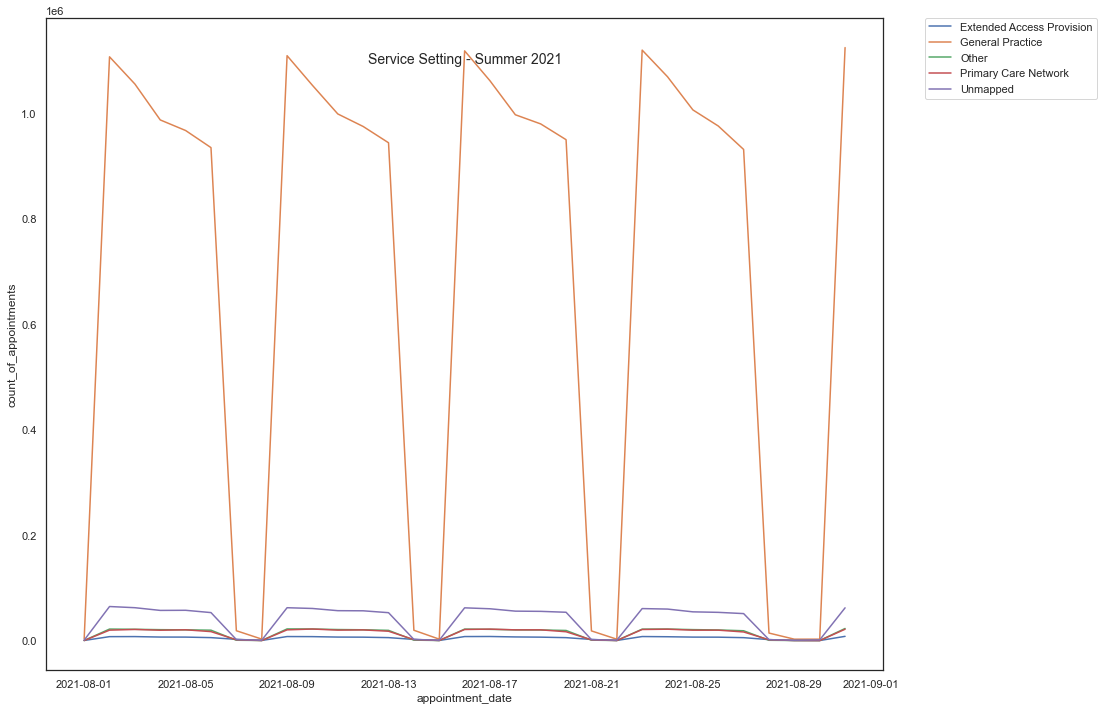

In [205]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for summer 2021
sns.lineplot(x='appointment_date', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss_day[nc_ss_day['appointment_month']\
                                                           == '2021-08'])\
.set_title("Service Setting - Summer 2021", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

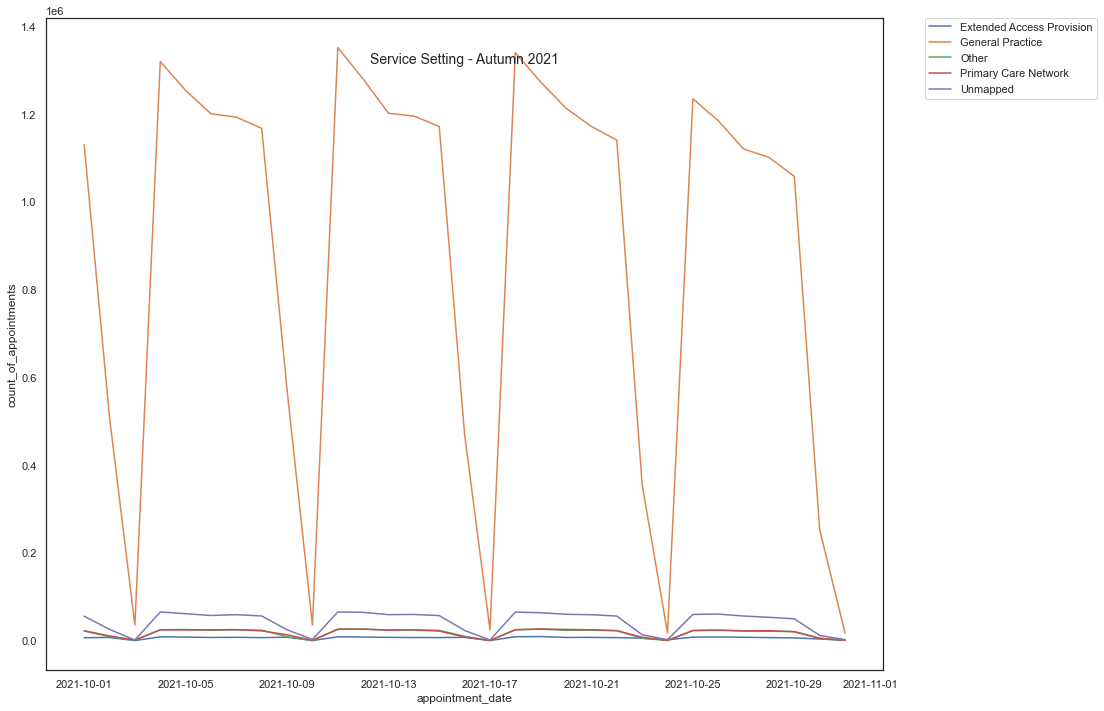

In [206]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for autumn 2021
sns.lineplot(x='appointment_date', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss_day[nc_ss_day['appointment_month']\
                                                           == '2021-10'])\
.set_title("Service Setting - Autumn 2021", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

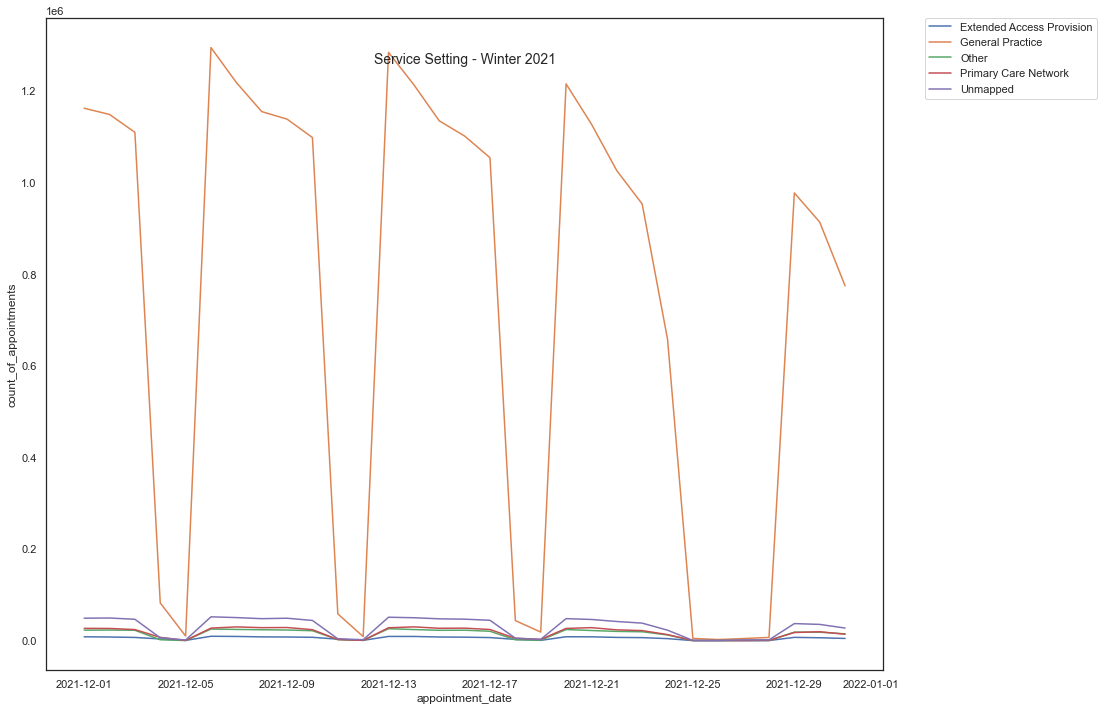

In [207]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for winter 2022
sns.lineplot(x='appointment_date', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss_day[nc_ss_day['appointment_month']\
                                                           == '2021-12'])\
.set_title("Service Setting - Winter 2021", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

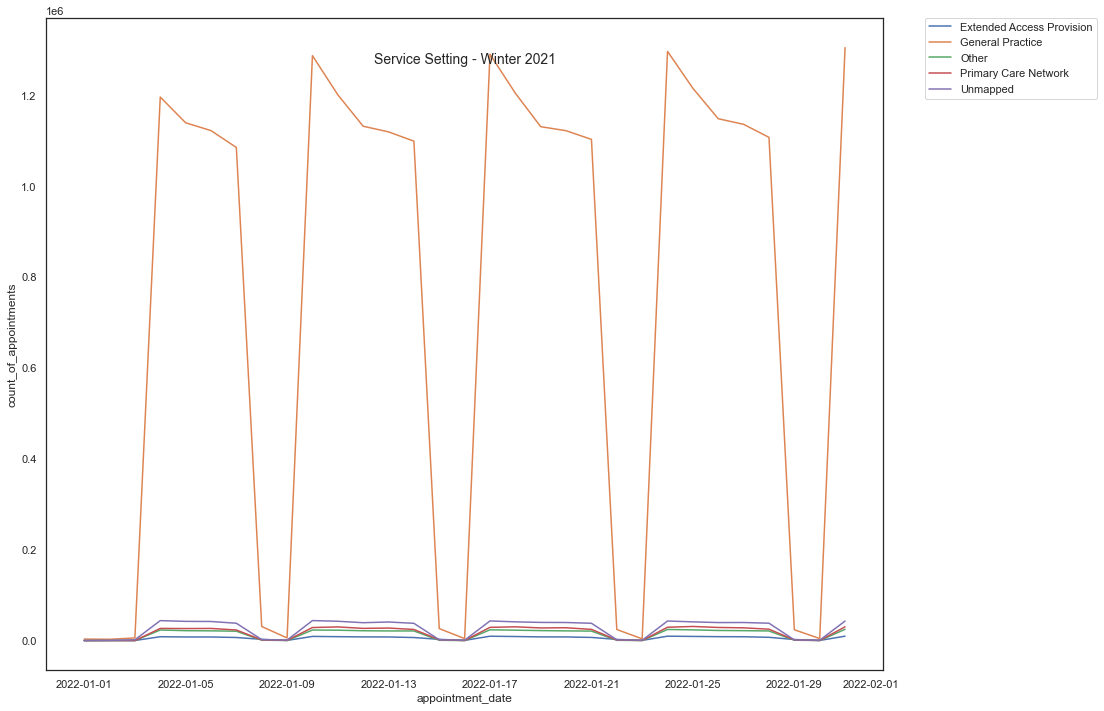

In [208]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for winter 2022
sns.lineplot(x='appointment_date', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss_day[nc_ss_day['appointment_month']\
                                                           == '2022-01'])\
.set_title("Service Setting - Winter 2021", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

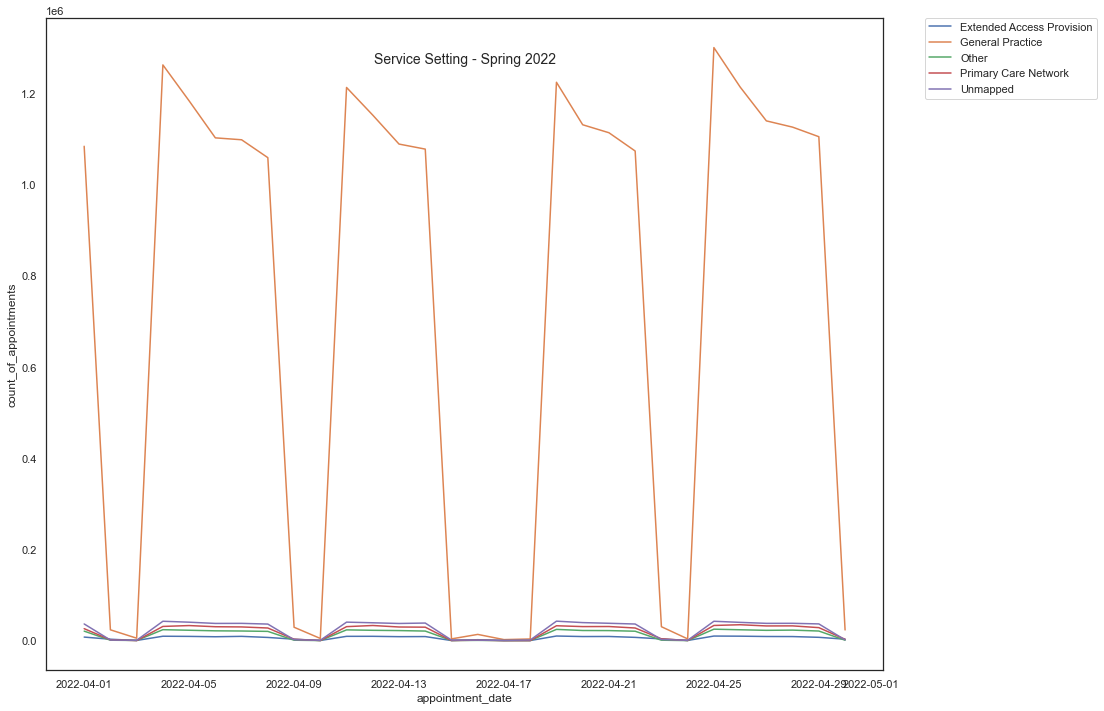

In [209]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for spring 2022
sns.lineplot(x='appointment_date', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_ss_day[nc_ss_day['appointment_month']\
                                                           == '2022-04'])\
.set_title("Service Setting - Spring 2022", fontsize=14, y=0.92)

# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Assignment 5 - Analyse the Twitter data

## Visualise the following

Identify and review the top trending hashtags (#) related to healthcare in the UK based on the data set received from the NHS.

In [210]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [211]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the top entries
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [212]:
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [213]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [214]:
# Explore the data set- review retweets
tweets['tweet_retweet_count'].value_counts().to_frame()

,tweet_retweet_count
0,526
1,215
2,114
3,70
5,35
4,27
7,18
12,16
8,15
73,14


In [215]:
# Explore the data set- review favourite
tweets['tweet_favorite_count'].value_counts().to_frame()

,tweet_favorite_count
0,1027
1,91
2,16
3,13
4,7
5,5
6,2
17,1
12,1
10,1


### Would it be useful to only look at retweeted and favourite tweet messages?  Explain your answer.

It would be useful to look at this but not solely this.  Both count lists will provide insight into which tweets have the most retweets or favourites.  You can also observe the almost instant drop from the top 4 to 5 rows to the succeeding entries.  Those interested in a deept dive to understand what gets the most engagement.

In [216]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [217]:
# Create a variable (tags,) and assign an empty list to it.
tags = []

In [218]:
# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
        
# Display all tags
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [219]:
hashtags = pd.Series(tags).value_counts()

hashtags

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Length: 1754, dtype: int64

In [220]:
# Display the first 30 records.
hashtags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [221]:
# Convert the series to a DataFrame in preparation for visualisation.
hashtags_df = pd.Series.to_frame(hashtags).reset_index()

hashtags_df.head(30)

,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [222]:
# Rename the columns.
hashtags_df.rename(columns = {'index':'Word', 0:'Count'}, inplace = True)

print(hashtags_df.columns)

Index(['Word', 'Count'], dtype='object')


In [223]:
# Ensure the count data type is an integer for data analysis.
print(hashtags_df.dtypes)

Word     object
Count     int64
dtype: object


In [224]:
# Display records where the count is larger than 10.
hashtags_df[hashtags_df.Count > 10]

,Word,Count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


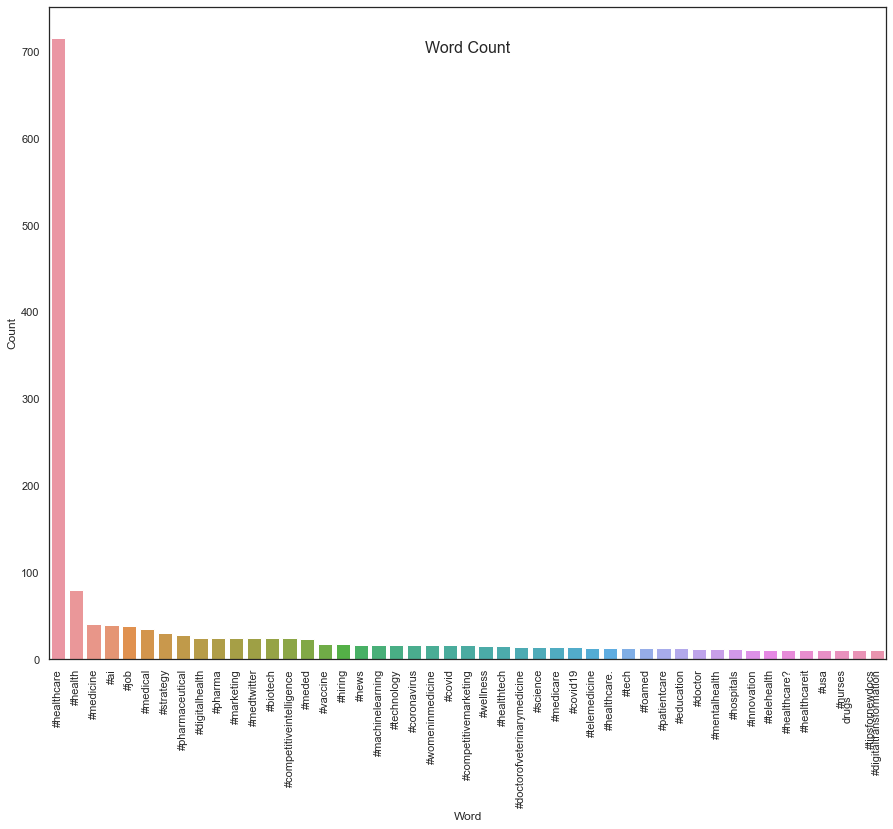

In [225]:
# Create a Seaborn barplot of all records with a count>10.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

sns.barplot(x='Word', y='Count', estimator=sum, data=hashtags_df[hashtags_df['Count'] >10])\
.set_title("Word Count", fontsize=16, y=0.92) 
plt.xticks(rotation=90) 
plt.show()

In [226]:
# Display records without the overrepresented hashtags

clean_hashtags = hashtags_df[(hashtags_df['Count'] > 10) &\
                             (hashtags_df['Count'] < 716)]

clean_hashtags.head(30)

,Word,Count
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25


<AxesSubplot:xlabel='Word', ylabel='Count'>

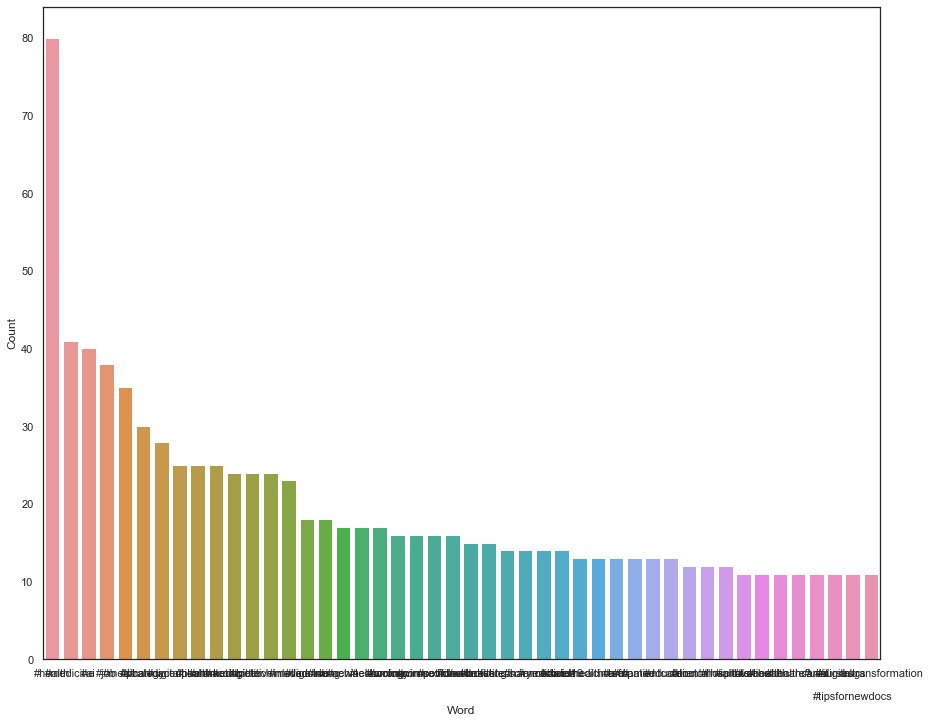

In [227]:
# Create a Seaborn barplot displaying the remaining most 
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

sns.barplot(x='Word', y='Count', estimator=sum, data=clean_hashtags)

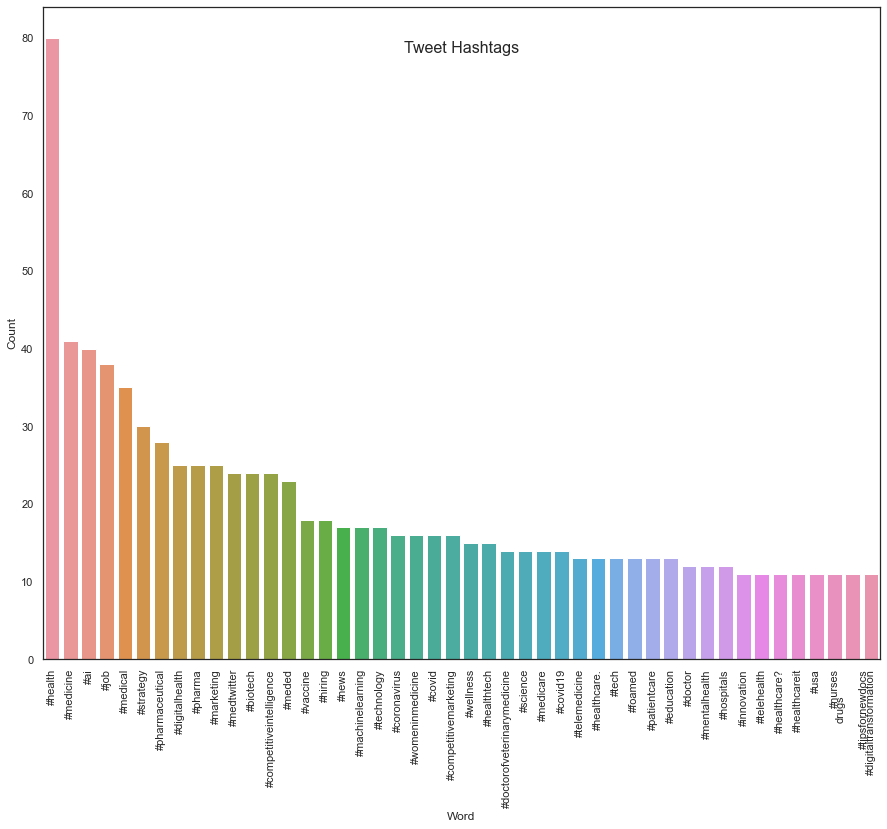

In [228]:
# Create a Seaborn barplot displaying the remaining most 
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

sns.barplot(x='Word', y='Count', estimator=sum, data=clean_hashtags)\
.set_title("Tweet Hashtags", fontsize=16, y=0.92) 
plt.xticks(rotation=90) 
plt.show() 

# Assignment 6 - Make recommendations

## Review findings and trends and make recommendations

Review the findings and trends you’ve identified during your data analysis; and, based on your understanding of the data, formulate questions to make recommendations to the NHS. Keep in mind the two main concerns this analysis is solving for.

The questions you might decide to explore include:

- Should the NHS start looking at increasing staff levels?
- How do the healthcare professional types differ over time?
- Are there significant changes in whether or not visits are attended?
- Are there changes in terms of appointment type and the busiest months?
- Are there any trends in time between booking and appointment?
- How do the various service settings compare?

In [229]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [230]:
# Determine the minimum and maximum dates in the ar DataFrame.
print(ar['appointment_month'].min(), '\n')
print(ar['appointment_month'].max(), '\n')

2020-01-01 00:00:00 

2022-06-01 00:00:00 



In [231]:
# Subset data to show only appointments from 2021-08-01 onwards
# between January 1 2022 and June 1 2022.
ar_aug2021=ar.loc[ar['appointment_month'] >= '2021-08-01']

ar_aug2021.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


In [232]:
ar_aug2021.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06-01,Unknown,Unknown,Unknown,Same Day,10


In [233]:
print(ar_aug2021.columns)

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


## Question 1: Should the NHS start looking at increasing staff levels?

In [234]:
# Create new DataFrame to review the different features
ar_agg = ar_aug2021.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment'])\
['count_of_appointments'].agg(sum).reset_index()

ar_agg


,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [235]:
# Sort values by month
ar_agg2 = ar_aug2021.groupby(['appointment_month'])['count_of_appointments'].agg(sum).reset_index()

ar_agg2

,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776
5,2022-01-01,25635474
6,2022-02-01,25355260
7,2022-03-01,29595038
8,2022-04-01,23913060
9,2022-05-01,27495508


Text(0.5, 1.0, 'Appointments Per Month')

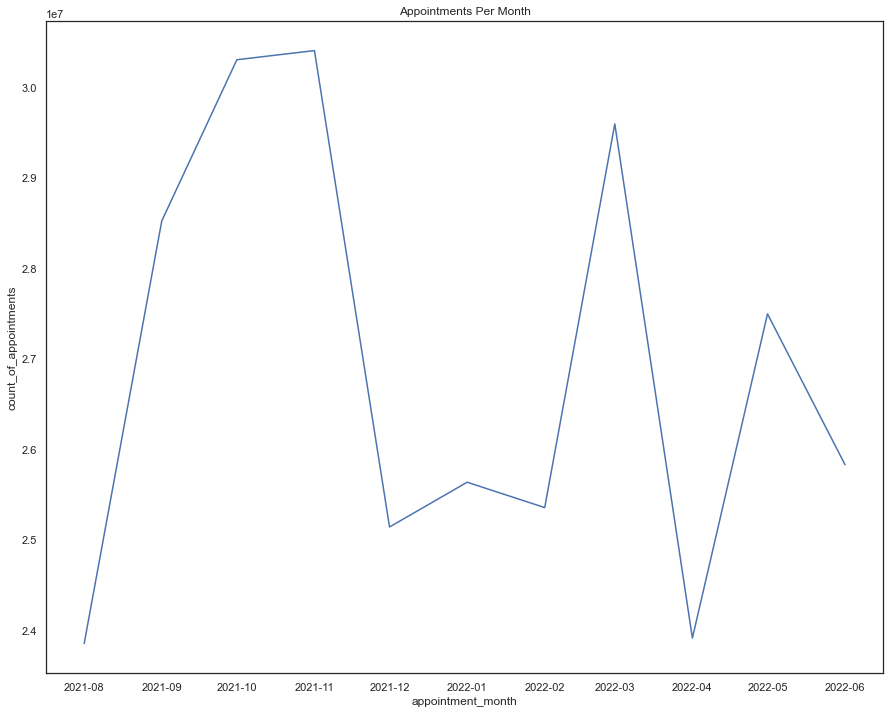

In [236]:
# Create lineplot for total appointments per month
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             ci=None, data=ar_agg2).set_title("Appointments Per Month")

In [237]:
# Determine average utilisation.  Create new DataFrame for total appointments per month.
ar_dfm = ar_aug2021.groupby('appointment_month')[['count_of_appointments']].agg(['sum', 'mean'])

ar_dfm

count_of_appointments             
                                    sum         mean
appointment_month                                   
2021-08-01                     23852171  1205.507480
2021-09-01                     28522501  1395.357419
2021-10-01                     30303834  1473.778523
2021-11-01                     30405070  1464.175575
2021-12-01                     25140776  1232.814005
2022-01-01                     25635474  1267.514166
2022-02-01                     25355260  1259.388069
2022-03-01                     29595038  1441.410384
2022-04-01                     23913060  1191.304738
2022-05-01                     27495508  1356.061748
2022-06-01                     25828078  1276.658494

In [238]:
# Review by descending order
ar_dfs = ar_aug2021.groupby('appointment_month')[['count_of_appointments']].agg(['sum'])

ar_dfs

,count_of_appointments
,sum
appointment_month,
2021-08-01,23852171
2021-09-01,28522501
2021-10-01,30303834
2021-11-01,30405070
2021-12-01,25140776
2022-01-01,25635474
2022-02-01,25355260
2022-03-01,29595038


In [239]:
ar_dfs['utilisation'] = ar_dfs.apply(lambda x: x / 30)

ar_dfs['utilisation']

appointment_month
2021-08-01    7.950724e+05
2021-09-01    9.507500e+05
2021-10-01    1.010128e+06
2021-11-01    1.013502e+06
2021-12-01    8.380259e+05
2022-01-01    8.545158e+05
2022-02-01    8.451753e+05
2022-03-01    9.865013e+05
2022-04-01    7.971020e+05
2022-05-01    9.165169e+05
2022-06-01    8.609359e+05
Name: utilisation, dtype: float64

In [240]:
ar_dfs['daily_utilisation'] = ar_dfs['utilisation'].apply(lambda x: (x / 1200000) * 100)
ar_dfs['daily_utilisation']

appointment_month
2021-08-01    66.256031
2021-09-01    79.229169
2021-10-01    84.177317
2021-11-01    84.458528
2021-12-01    69.835489
2022-01-01    71.209650
2022-02-01    70.431278
2022-03-01    82.208439
2022-04-01    66.425167
2022-05-01    76.376411
2022-06-01    71.744661
Name: daily_utilisation, dtype: float64

In [241]:
ar_dfs.round(1)

,count_of_appointments,utilisation,daily_utilisation
,sum,,
appointment_month,,,
2021-08-01,23852171,795072.4,66.3
2021-09-01,28522501,950750.0,79.2
2021-10-01,30303834,1010127.8,84.2
2021-11-01,30405070,1013502.3,84.5
2021-12-01,25140776,838025.9,69.8
2022-01-01,25635474,854515.8,71.2
2022-02-01,25355260,845175.3,70.4
2022-03-01,29595038,986501.3,82.2


Text(0.5, 1.0, 'Utilisation Per Month')

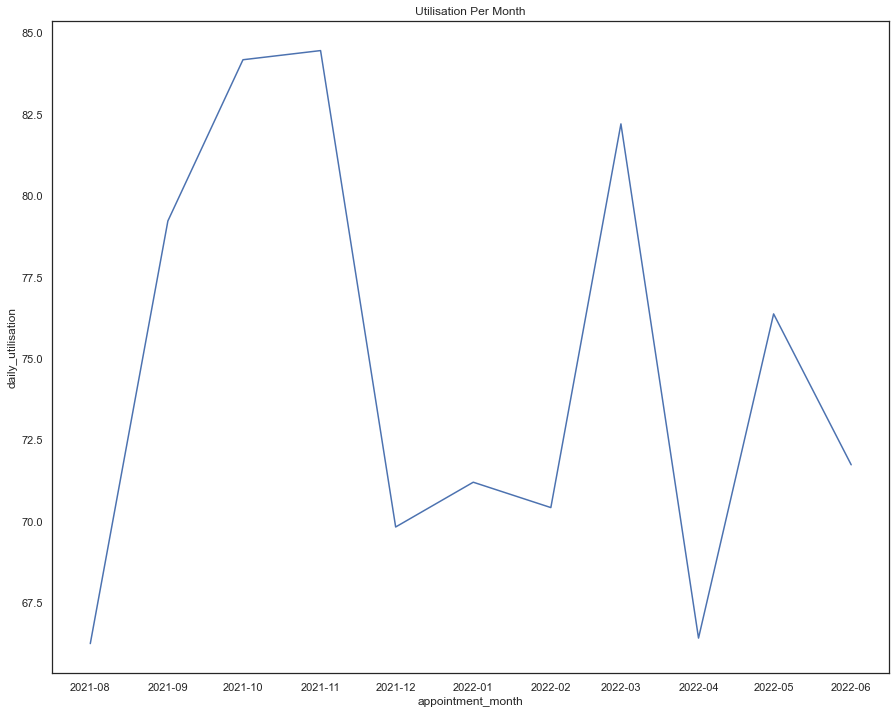

In [242]:
# Create empty plot and set plot size. 
sns.set(rc={'figure.figsize':(15,12)})

# Set the plot style as white.
sns.set_style('white')

# Create lineplot for total appointments per month
sns.lineplot(x='appointment_month', y='daily_utilisation',\
             ci=None, data=ar_dfs).set_title("Utilisation Per Month")

## Question 2: How do the healthcare professional types differ over time?

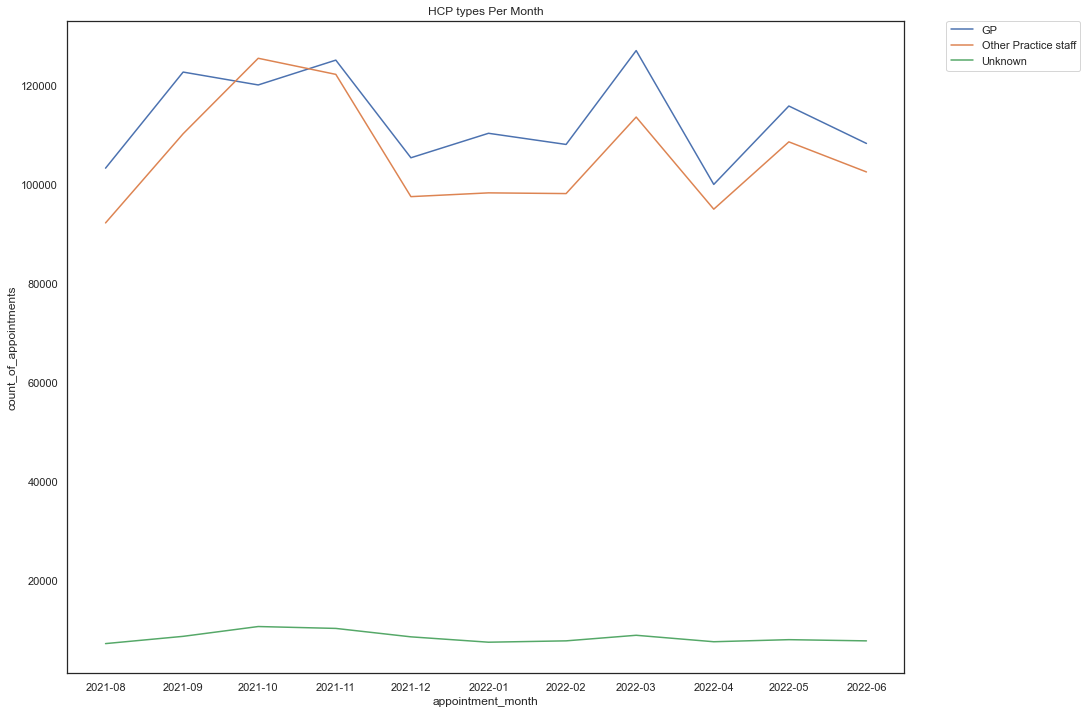

In [243]:
# Create lineplot for healthcare professional types
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='hcp_type', ci=None, data=ar_agg).set_title("HCP types Per Month")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Question 3: Are there significant changes in whether or not visits are attended?

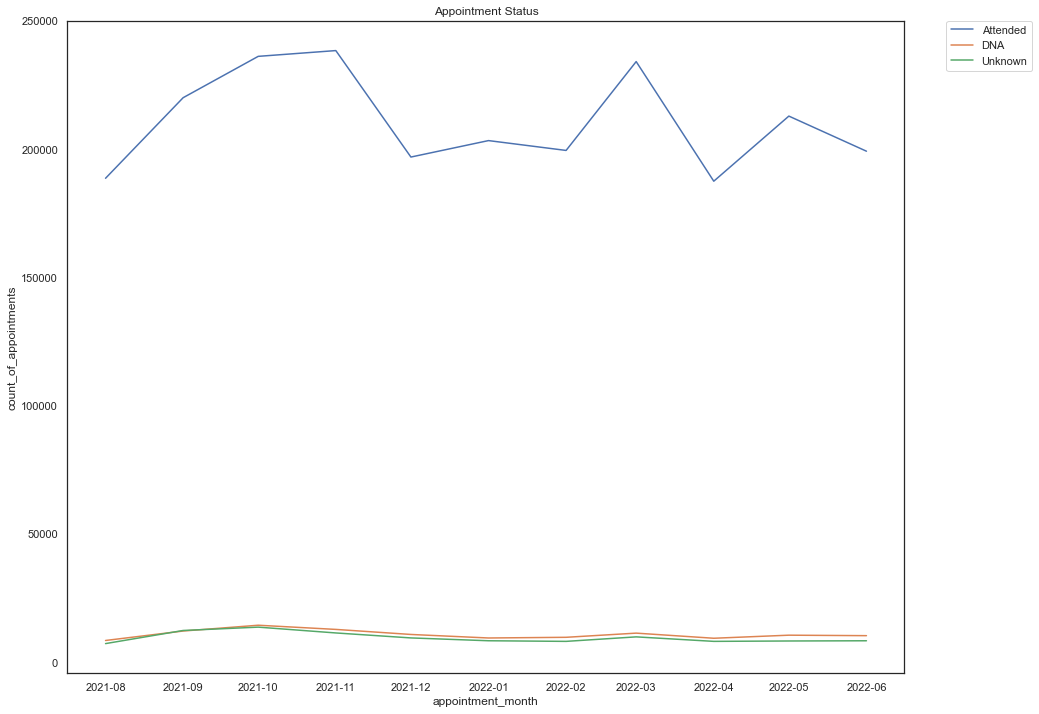

In [244]:
# Create lineplot for attendance of appointments (status)
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='appointment_status', ci=None, data=ar_agg).set_title("Appointment Status")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Question 4: Are there changes in terms of appointment type and the busiest months?

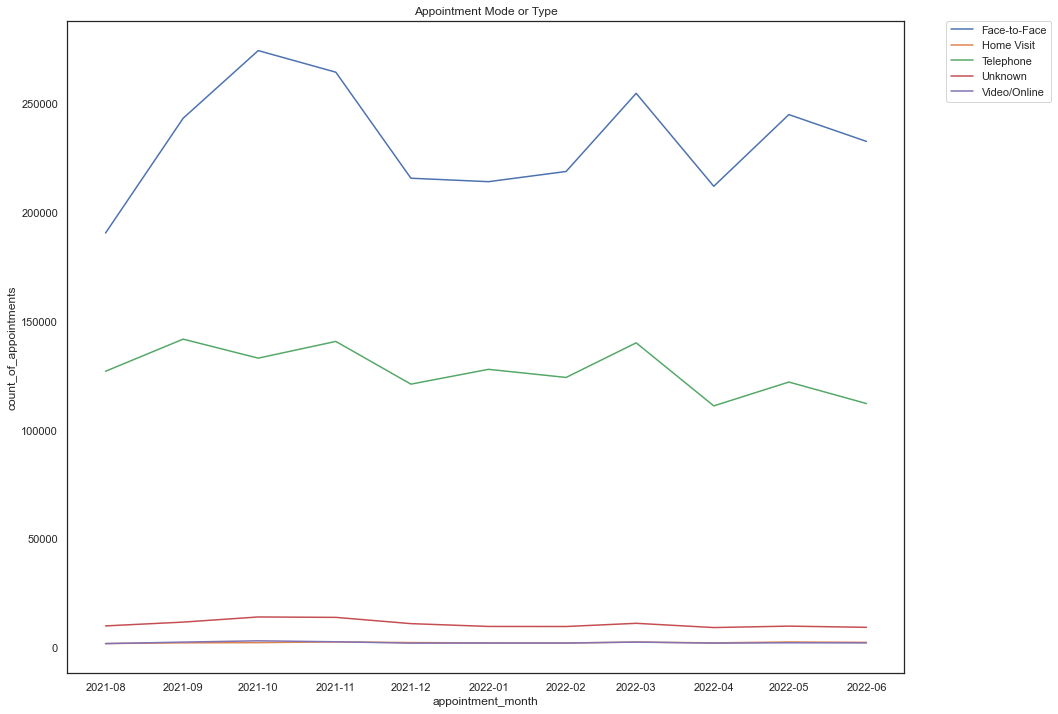

In [245]:
# Create lineplot for appointment type and volume
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='appointment_mode', ci=None, data=ar_agg).set_title("Appointment Mode or Type")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Question 5: Are there any trends in time between booking an appointment?

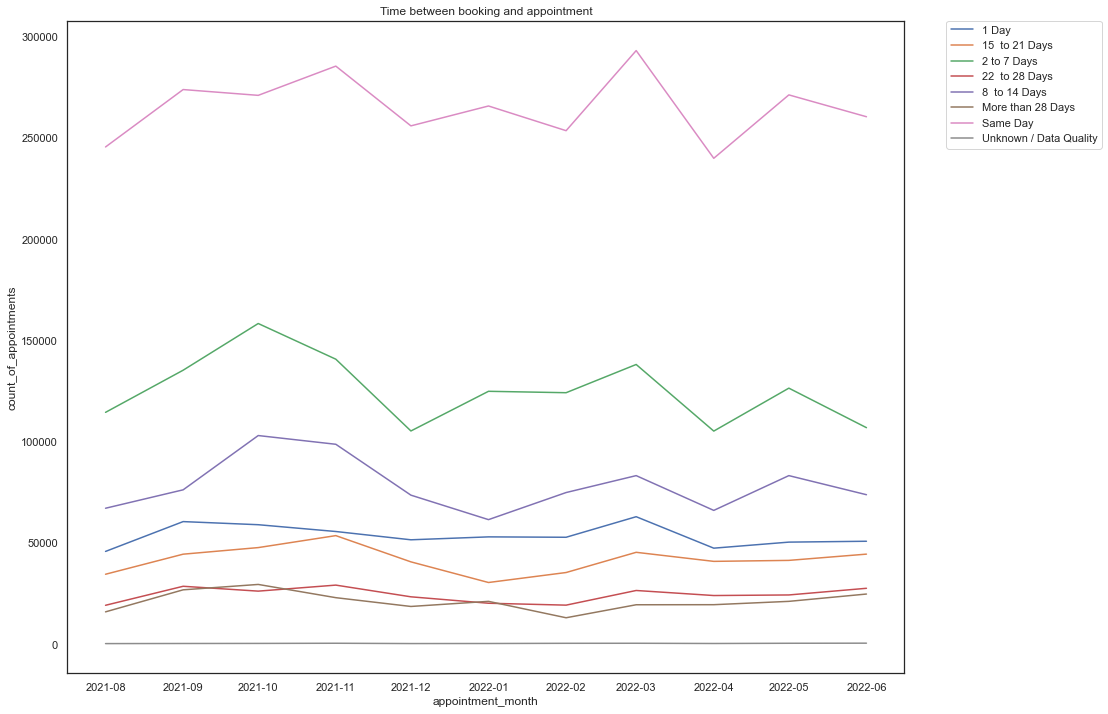

In [246]:
# Create lineplot for time between booking an appointment
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='time_between_book_and_appointment', ci=None, data=ar_agg)\
.set_title("Time between booking and appointment")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [247]:
# Sort values by month
tbbaa_appstat = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment', 'appointment_status' ])\
['count_of_appointments'].agg(sum).reset_index()
tbbaa_appstat

,appointment_month,time_between_book_and_appointment,appointment_status,count_of_appointments
0,2021-08-01,1 Day,Attended,1884017
1,2021-08-01,1 Day,DNA,73344
2,2021-08-01,1 Day,Unknown,60958
3,2021-08-01,15 to 21 Days,Attended,1271700
4,2021-08-01,15 to 21 Days,DNA,106029
...,...,...,...,...
259,2022-06-01,Same Day,DNA,208880
260,2022-06-01,Same Day,Unknown,248911
261,2022-06-01,Unknown / Data Quality,Attended,17314
262,2022-06-01,Unknown / Data Quality,DNA,364


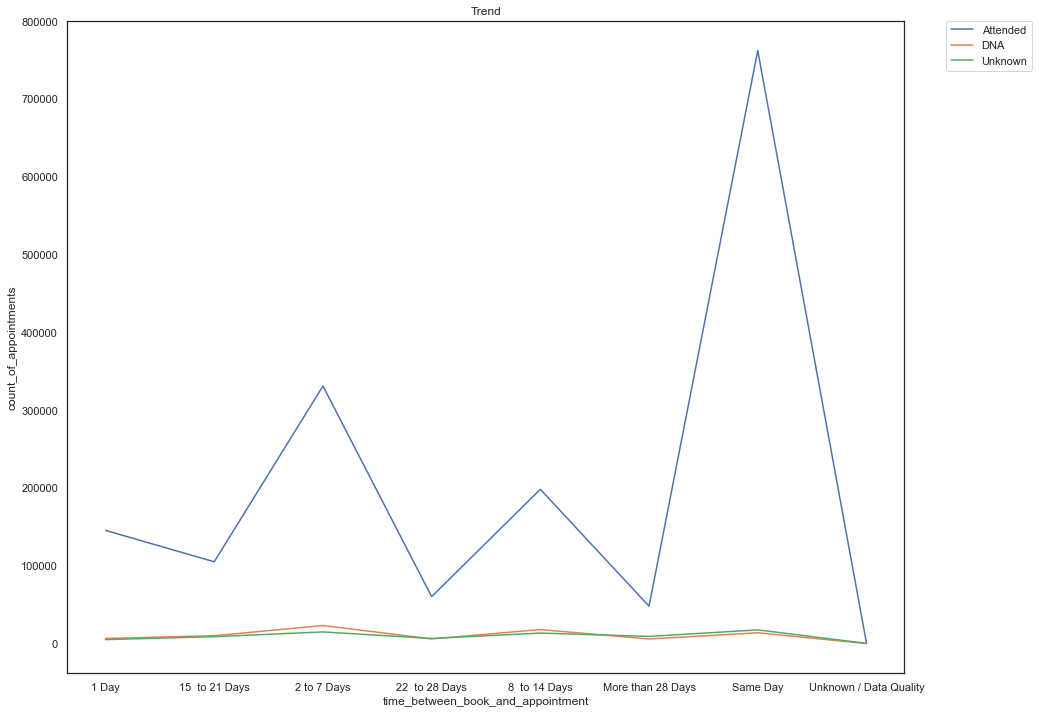

In [248]:
# Create lineplot for attendance of appointments (status)
sns.lineplot(x='time_between_book_and_appointment', y='count_of_appointments',\
             hue='appointment_status', ci=None, data=ar_agg).set_title("Trend")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Question 6: How do the various service settings compare?

In [249]:
print(nc.shape)
print(nc.columns)

nc

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [250]:
# Sort values by month
nc_agg = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].agg(sum).reset_index()

print(nc_agg.shape)
nc_agg

(55, 3)


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


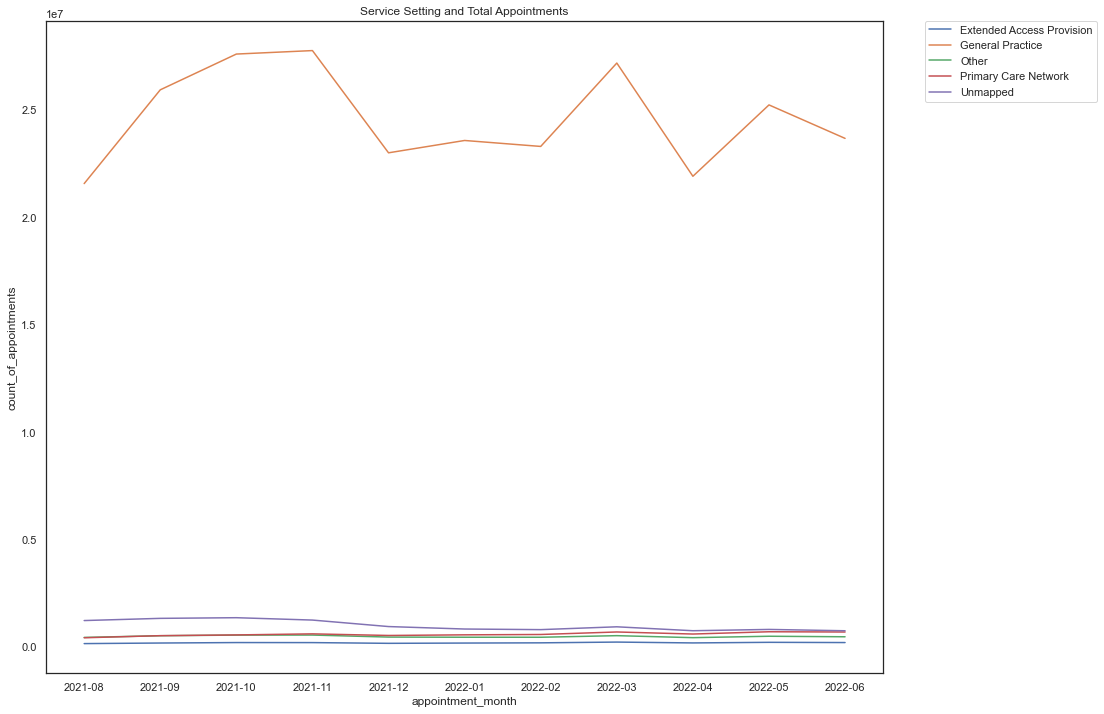

In [251]:
# Create lineplot for nc service settings and number of appointments
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='service_setting', ci=None, data=nc_agg)\
.set_title("Service Setting and Total Appointments")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [252]:
ss_no_gp = nc_agg.loc[nc_agg['service_setting'] != "General Practice"]
                      
print(ss_no_gp.shape)
ss_no_gp

(44, 3)


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115
10,2021-10,Extended Access Provision,209539
12,2021-10,Other,556487


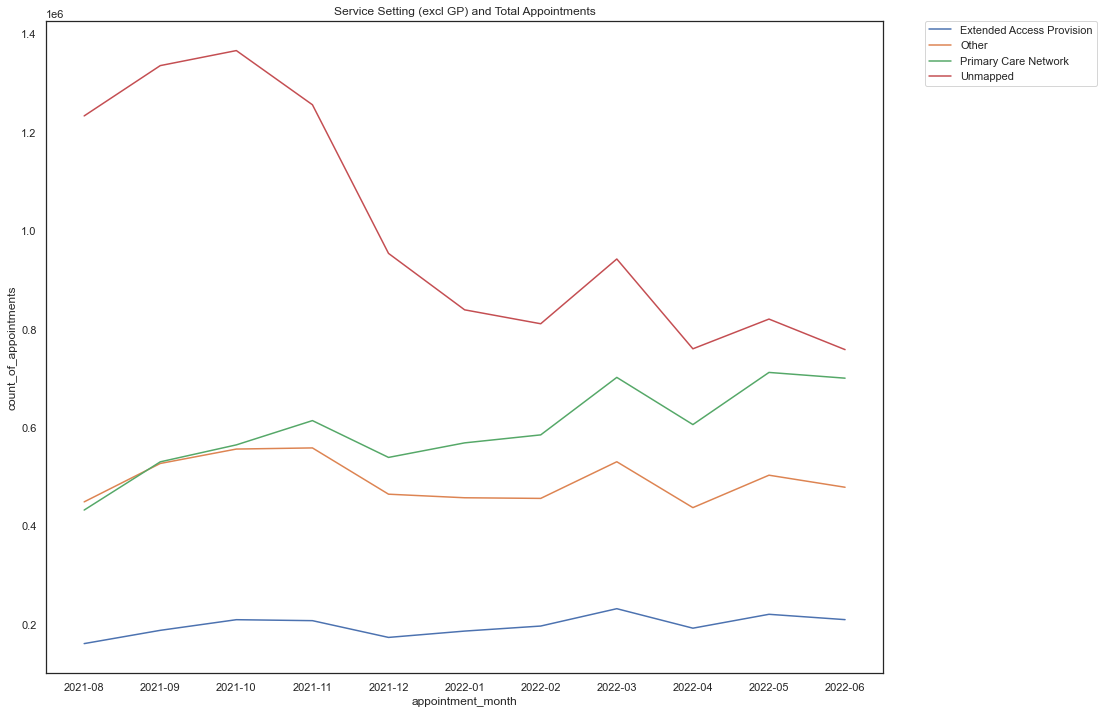

In [253]:
# Create lineplot for nc service settings and number of appointments concentrating on other service settings
# Excluding GP visits
sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='service_setting', ci=None, data=ss_no_gp)\
.set_title("Service Setting (excl GP) and Total Appointments")


# Put the legend out of the figure as it overlaps data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)